In [46]:
import pandas as pd
import numpy as np
from glob import glob
import json
import os
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [40]:
rows = []
for path in glob("logs/**/*.json"):
    contents = json.loads(open(path).read())
    dic = {
        "model": path.split("/")[1]
    }
    if 'latest' in path:
        continue
    dic['epoch'] = int(re.search(r"epoch\_([0-9]+).pt.json", path).groups(1)[0])
    n = 4 if 'sugar' in path else 1
    dic['dataset'] = '_'.join(os.path.basename(path).split("_")[0:n])
    dic.update(contents)
    rows.append(dic)
df = pd.DataFrame(rows)
df.head()

df['model'].unique(), df['dataset'].unique()


model_last_epoch = df.groupby('model').max().epoch.to_dict()
df['last_epoch'] = df.model.apply(lambda m:model_last_epoch[m])

# Leaderboard

In [51]:
df[ (df.dataset=='imagenet1k') & (df.epoch==df.last_epoch)].sort_values(by='acc1', ascending=False)[['model', 'acc1']].round(3)

,model,acc1
495,datacomp_dec_vision_dinov2g14_text_b32_locked_image_ep10_lr0.0005_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n16_bs256,0.628
314,datacomp_dec_vision_dinov2l14_text_b32_locked_image_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.573
138,datacomp_dec_vision_dinov2s14_text_b32_locked_image_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.513
446,datacomp_dec_b32_vision_datacomp_xl_s13b_b90k_text_scratch_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.402
557,datacomp_dec_ViT-B-16_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.373
607,datacomp_dec_vision_dinov2g14_text_l14_locked_image_ep10_lr0.0003_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n16_bs256,0.351
236,datacomp_dec_ViT-B-32_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.321
632,datacomp_dec_ViT-B-32_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs256,0.321
761,datacomp_dec_vision_dinov2s14_text_b32_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.318
35,datacomp_dec_ViT-B-16_ep100_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.291


In [52]:
df[ (df.dataset=='sugar_crepe_swap_obj') & (df.epoch==df.last_epoch)].sort_values(by='acc', ascending=False)[['model', 'acc']].round(3)

,model,acc
560,datacomp_dec_ViT-B-16_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.768
303,datacomp_dec_vision_dinov2l14_text_b32_locked_image_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.736
417,datacomp_dec_b32_vision_datacomp_xl_s13b_b90k_text_scratch_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.728
110,datacomp_dec_ViT-B-16_ep100_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.711
250,datacomp_dec_ViT-B-32_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.711
754,datacomp_dec_vision_dinov2s14_text_b32_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.711
178,datacomp_dec_vision_dinov2s14_text_b32_locked_image_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.707
321,datacomp_dec_ViT-B-32_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_linear_n8_bs512,0.707
735,datacomp_dec_ViT-B-16_ep100_lr0.0005_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs512,0.703
612,datacomp_dec_ViT-B-32_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n8_bs256,0.683


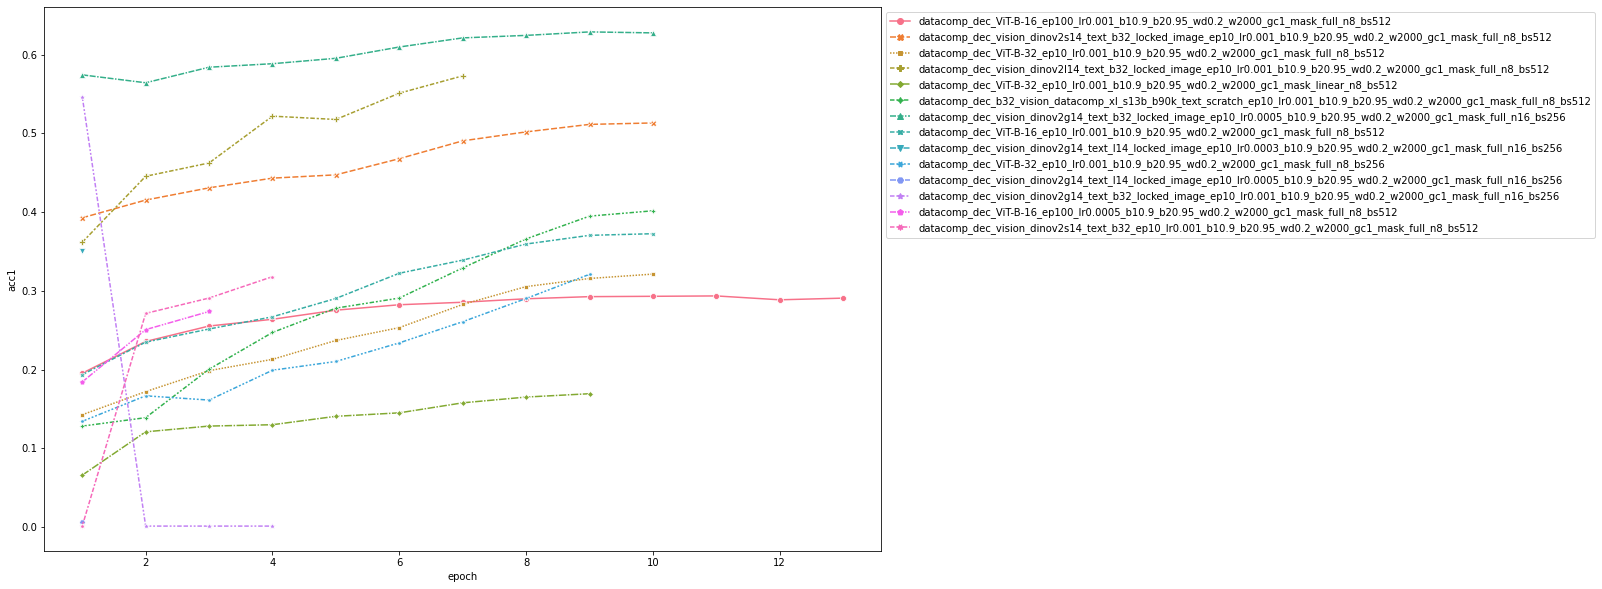

In [36]:
ds = 'imagenet1k'
fig = plt.figure(figsize=(15,10))
sns.lineplot(x='epoch', y='acc1', hue='model', data=df[df.dataset==ds], style='model', markers=True)
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.show()

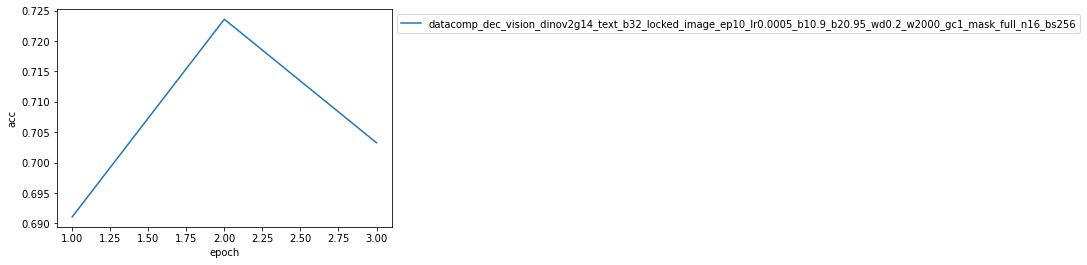

In [28]:
ds = 'sugar_crepe_swap_obj'
d = df[df.dataset==ds]

#d = d[d.model!='datacomp_dec_vision_dinov2g14_text_b32_locked_image_ep10_lr0.001_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n16_bs256']
d = d[d.model=='datacomp_dec_vision_dinov2g14_text_b32_locked_image_ep10_lr0.0005_b10.9_b20.95_wd0.2_w2000_gc1_mask_full_n16_bs256']

sns.lineplot(x='epoch', y='acc', hue='model', data=d, style='model')
plt.legend(loc='best', bbox_to_anchor=(1,1))
#plt.xticks(np.arange(1, df.epoch.max()+1))
plt.show()